In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Comms

In [2]:
def shannon(B, CN):
    return B*np.log2(1+CN)

In [3]:
B = 1000000*10
R = shannon(B, CN)

In [111]:
class SNRConstants:
    def __init__(self, D, Pt):
        self.D = D
        self.Gt = 6
        self.Pt = Pt
        self.B = 1000000*10
        self.T = 150
        self.k = 1.380649e-23 
        self.e = 0.9

In [112]:
def SNR(constants, r):
    e = constants.e
    D = constants.D
    Gt = constants.Gt
    Pt = constants.Pt
    
    B = constants.B
    T = constants.T
    k = constants.k
    e = constants.e
    
    num = e*D**2*Gt*Pt
    denom = 16*(r*1.496e11)**2*k*B*T
    return num / denom

In [113]:
r = np.arange(0.01, 2, 0.01)
constants64mPt15 = SNRConstants(D = 64, Pt = 15)
constants35mPt15 = SNRConstants(D = 35, Pt = 15)

snr64mPt15 = SNR(constants64mPt15, r)
snr35mPt15 = SNR(constants35mPt15, r)

In [114]:
R64mPt15 = shannon(B, snr64mPt15)
R35mPt15 = shannon(B, snr35mPt15)

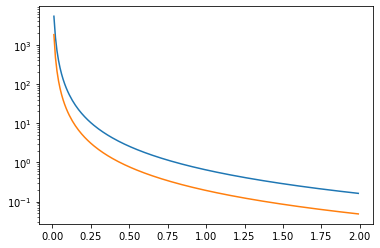

In [115]:
plt.plot(r, R64mPt15/1000)
plt.plot(r, R35mPt15/1000)
plt.yscale("log")

In [116]:
def rateAt(P, dist, size):
    """P is in W, dist is in AU, antennae size is in meters"""
    constants = SNRConstants(size, P)
    snr = SNR(constants, dist)
    return shannon(B, snr)

In [123]:
rateAt(35, 1.2, 0.6)

0.09192182670301939

Downarrow: Rate for a fixed distance is directly proportional to power. It's difficult to get a high data rate without needing a huge battery, so let's go low and target around 0.1 kpbs at the asteroid (for reference, Dawn has a downlink rate of 124 kpbs and uplink rate of 1 kpbs). Don't want the size of the transmitter antennae diameter to be above ~0.7 meters. As such, let's target a power of 35 Watts. 

## S